# Imports

In [1]:
import datacomp as dc

# Data setup

In [ ]:
# load Data
datacol = dc.get_data("simulated.csv", ["Dataset1", "Dataset2", "Dataset3"], ["CATSIG1", "CATNON2"], "DATASET")

# compare only baseline data
datacol.reduce_dfs_to_value("TIME", 0)

# exlude following features from comparison
exclude_feats = ["TIME", "DATASET"]

# MANOVA features
manova_feats = ["NDNON1", "NDNON2", "BATCH2"]

# Visualize feature overlap

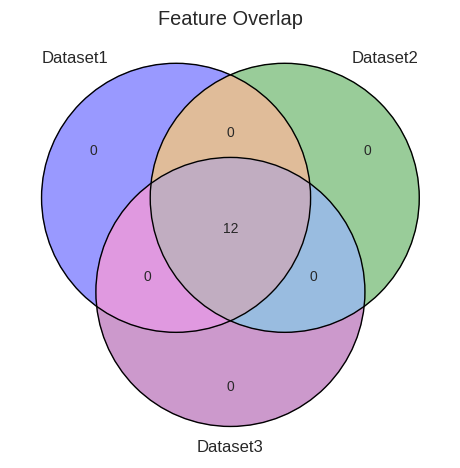

In [3]:
datacol.feat_venn_diagram()

# Statistical comparison

In [4]:
results = datacol.analyze_feature_ranges(exclude=exclude_feats).sort_index()
results

Fraction of significantly deviating features: 18/30


pv        cor_pv  signf
BATCH1  (1, 2)   6.320921e-01  9.801085e-01  False
        (1, 3)   1.886473e-75  0.000000e+00   True
        (2, 3)   6.467145e-80  0.000000e+00   True
BATCH2  (1, 2)   4.794715e-01  9.801085e-01  False
        (1, 3)   7.145351e-58  0.000000e+00   True
        (2, 3)   1.947774e-56  0.000000e+00   True
CATNON2 (1, 2)   6.109843e-01  9.801085e-01  False
        (1, 3)   2.383379e-01  8.512913e-01  False
        (2, 3)   6.202925e-01  9.801085e-01  False
CATSIG1 (1, 2)   2.114908e-44  0.000000e+00   True
        (1, 3)  3.109835e-235  0.000000e+00   True
        (2, 3)   5.519607e-79  0.000000e+00   True
CHIFEAT (1, 2)   4.601937e-07  6.879175e-06   True
        (1, 3)   3.861014e-22  0.000000e+00   True
        (2, 3)   4.586131e-07  6.879175e-06   True
FEAT1   (1, 2)   4.351614e-05  5.655622e-04   True
        (1, 3)   7.197353e-11  1.151577e-09   True
        (2, 3)   1.960949e-02  2.115228e-01  False
NDNON1  (1, 2)   8.752746e-01  9.801085e-01  False
        (1, 3)   1.567899e-01  8.182987e-01  False
        (2, 3)   1.983381e-01  8.326720e-01  False
NDNON2  (1, 2)   7.639534e-02  5.827972e-01  False
        (1, 3)   1.801586e-01  8.326720e-01  False
        (2, 3)   5.329092e-01  9.801085e-01  False
NDSIG1  (1, 2)   7.981381e-12  1.356837e-10   True
        (1, 3)   3.137569e-63  0.000000e+00   True
        (2, 3)   1.324202e-41  0.000000e+00   True
NDSIG2  (1, 2)   2.101415e-78  0.000000e+00   True
        (1, 3)   4.123551e-80  0.000000e+00   True
        (2, 3)   5.178008e-79  0.000000e+00   True

# Visualization of significant deviations

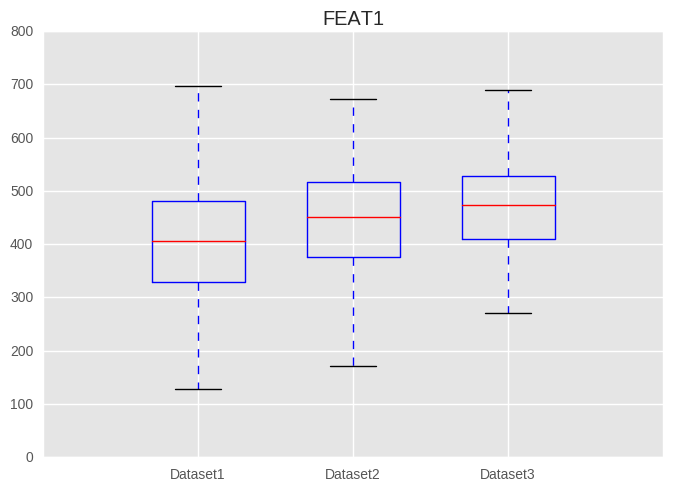

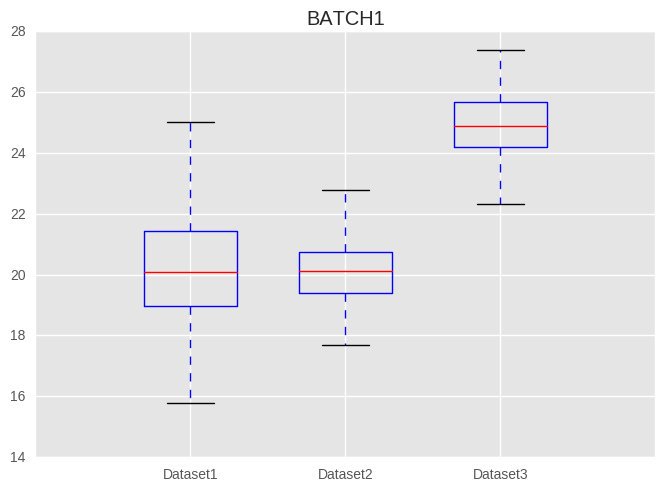

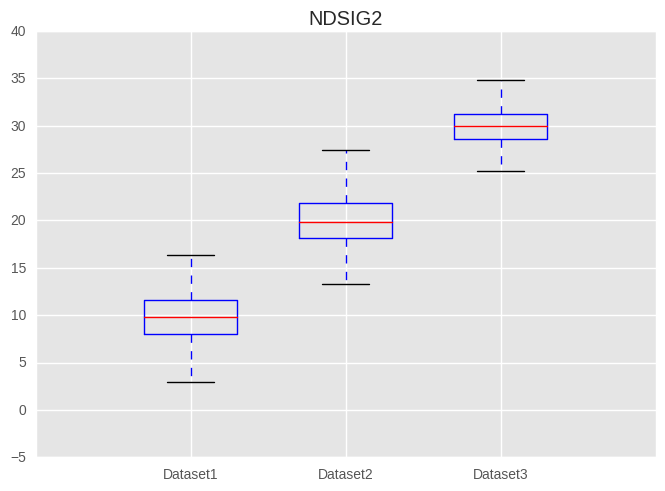

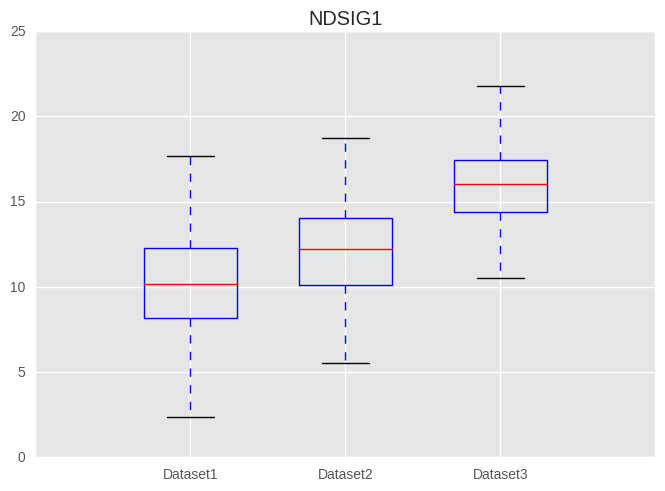

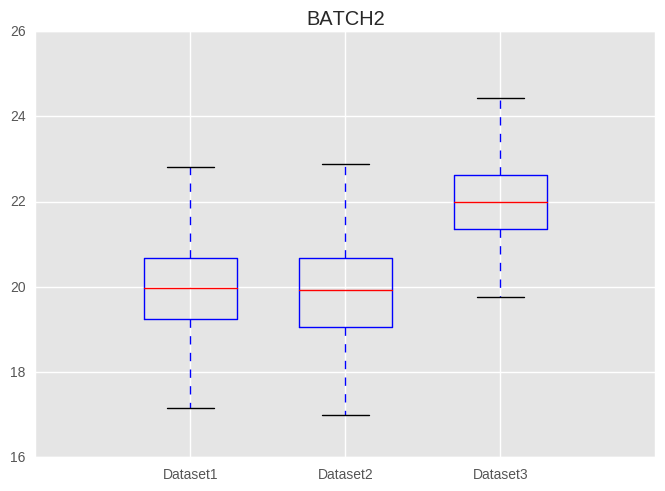

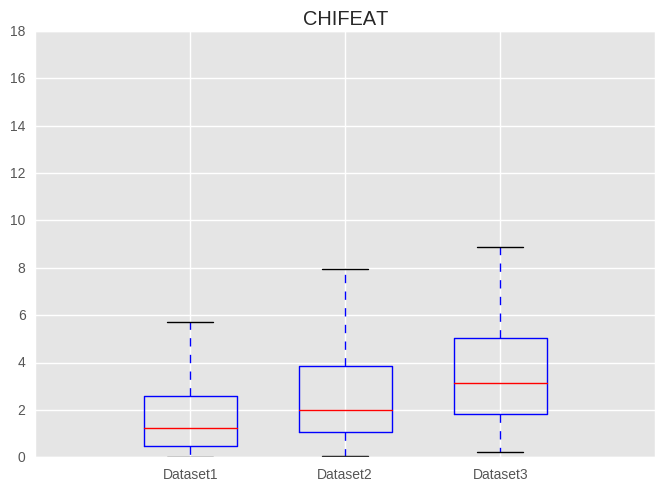

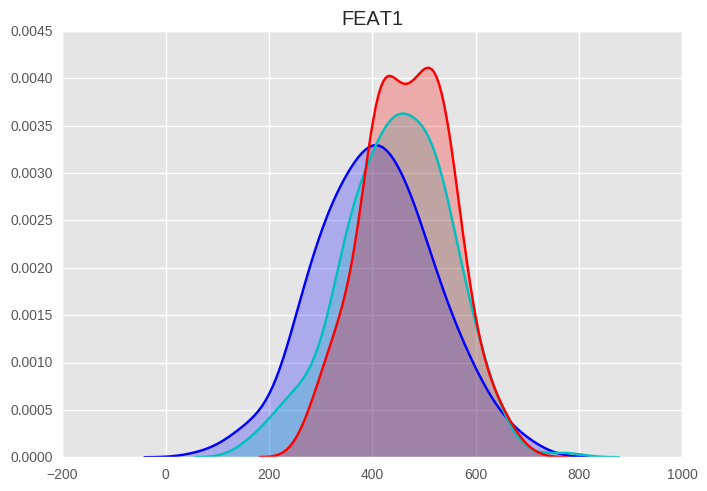

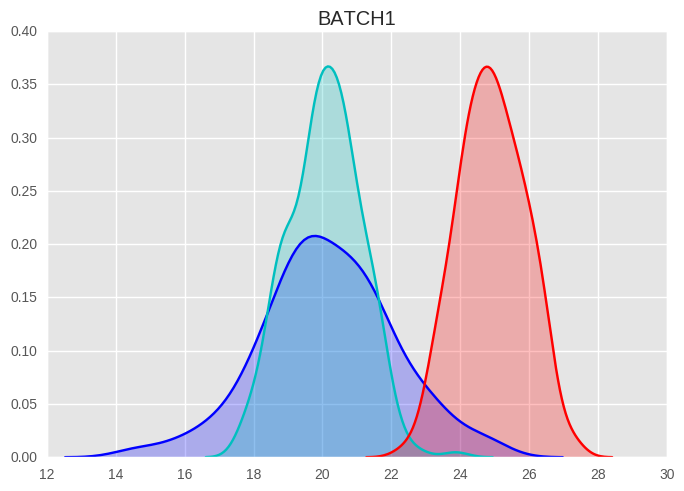

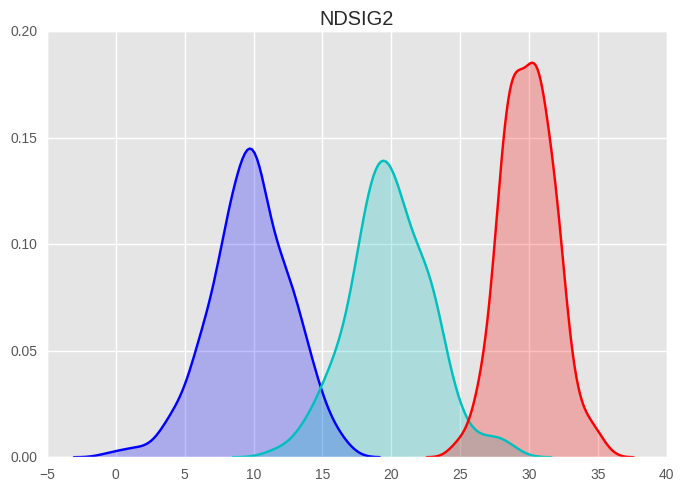

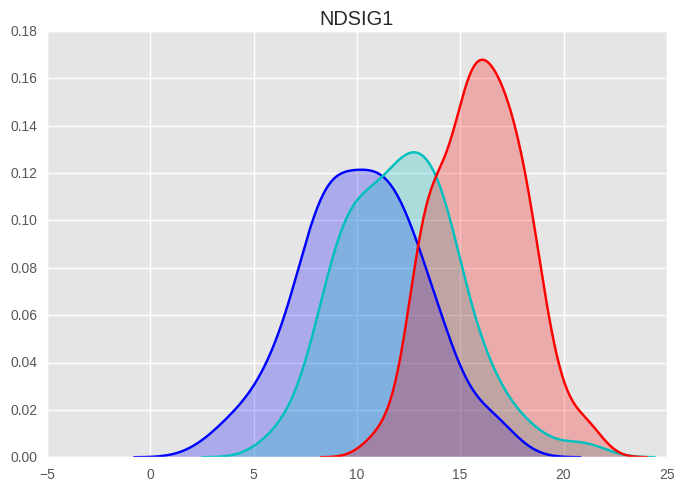

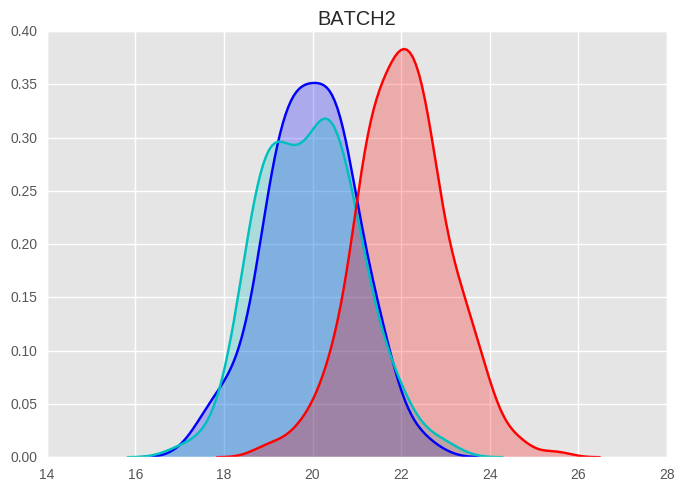

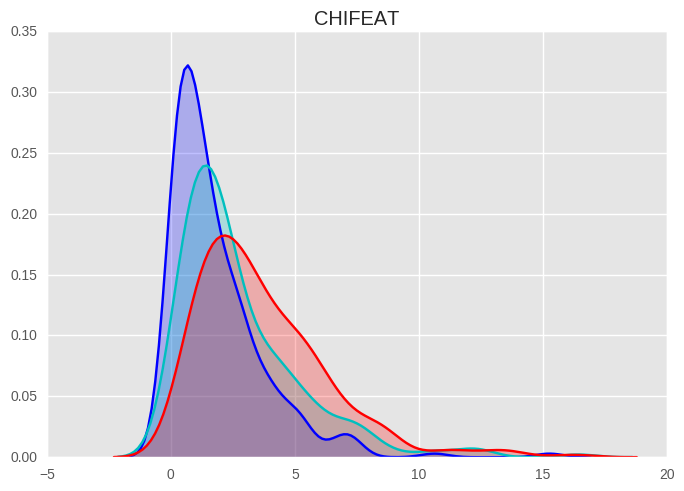

In [5]:
dc.plot_sig_num_feats(datacol, results)

# 

# MANOVA

In [6]:
dc.manova(datacol, "DATASET", manova_feats)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Multivariate linear model
==================================================================
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda   0.0042 3.0000 716.0000 56531.4179 0.0000
         Pillai's trace   0.9958 3.0000 716.0000 56531.4179 0.0000
 Hotelling-Lawley trace 236.8635 3.0000 716.0000 56531.4179 0.0000
    Roy's greatest root 236.8635 3.0000 716.0000 56531.4179 0.0000
------------------------------------------------------------------
                                                                  
-------------------------------------------------------------------
         DATASET          Value   Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
           Wilks' lambda  0.8837  3.0000  716.0000  31.4090  0.0000
          Pillai's trace  0.1163  3.0000  716.0000  31.4090  0.0000
  Hotelling-Lawley trace  0.1316  3.0000  716.0000  31.4090  0.0000
     Roy's greatest root  0.1316  3.0000  716.0000  31.4090  0.0000
==================================================================

"""